# Exploratory Data Analysis for sample_hotels.csv

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [184]:
# --- Load the dataset with encoding fallback ---
try:
    df = pd.read_csv('hotels.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('hotels.csv', encoding='latin1')

In [185]:
# --- Clean column names (remove leading/trailing spaces) ---
df.columns = df.columns.str.strip()

In [186]:
# --- Clean and map HotelRating to numeric ---
df['HotelRating'] = df['HotelRating'].astype(str).str.strip().str.lower()
rating_map = {
    'onestar': 1, 'twostar': 2, 'threestar': 3, 'fourstar': 4, 'fivestar': 5,
    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5,
    '1star': 1, '2star': 2, '3star': 3, '4star': 4, '5star': 5,
    'one star': 1, 'two star': 2, 'three star': 3, 'four star': 4, 'five star': 5,
    '1 star': 1, '2 star': 2, '3 star': 3, '4 star': 4, '5 star': 5,
    'all': np.nan, 'none': np.nan, 'nan': np.nan, '': np.nan
}
df['HotelRating'] = df['HotelRating'].map(rating_map)

In [187]:
# --- Basic Data Overview ---
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))

Shape: (1010033, 16)
Columns: ['countyCode', 'countyName', 'cityCode', 'cityName', 'HotelCode', 'HotelName', 'HotelRating', 'Address', 'Attractions', 'Description', 'FaxNumber', 'HotelFacilities', 'Map', 'PhoneNumber', 'PinCode', 'HotelWebsiteUrl']


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,4.0,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,4.0,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,3.0,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,3.0,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,3.0,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...



Missing values per column:
 countyCode            912
countyName              0
cityCode                0
cityName                0
HotelCode               0
HotelName               0
HotelRating        315668
Address               102
Attractions        525092
Description         47005
FaxNumber          560347
HotelFacilities     50378
Map                   930
PhoneNumber        327137
PinCode             30979
HotelWebsiteUrl    250118
dtype: int64

Summary statistics:
        countyCode     countyName      cityCode cityName     HotelCode  \
count     1009121        1010033  1.010033e+06  1010033  1.010033e+06   
unique        134            136           NaN    41821           NaN   
top            US  United States           NaN   London           NaN   
freq       139868         139868           NaN     5962           NaN   
mean          NaN            NaN  1.274184e+05      NaN  2.850143e+06   
std           NaN            NaN  1.353500e+04      NaN  1.991153e+06   
min      

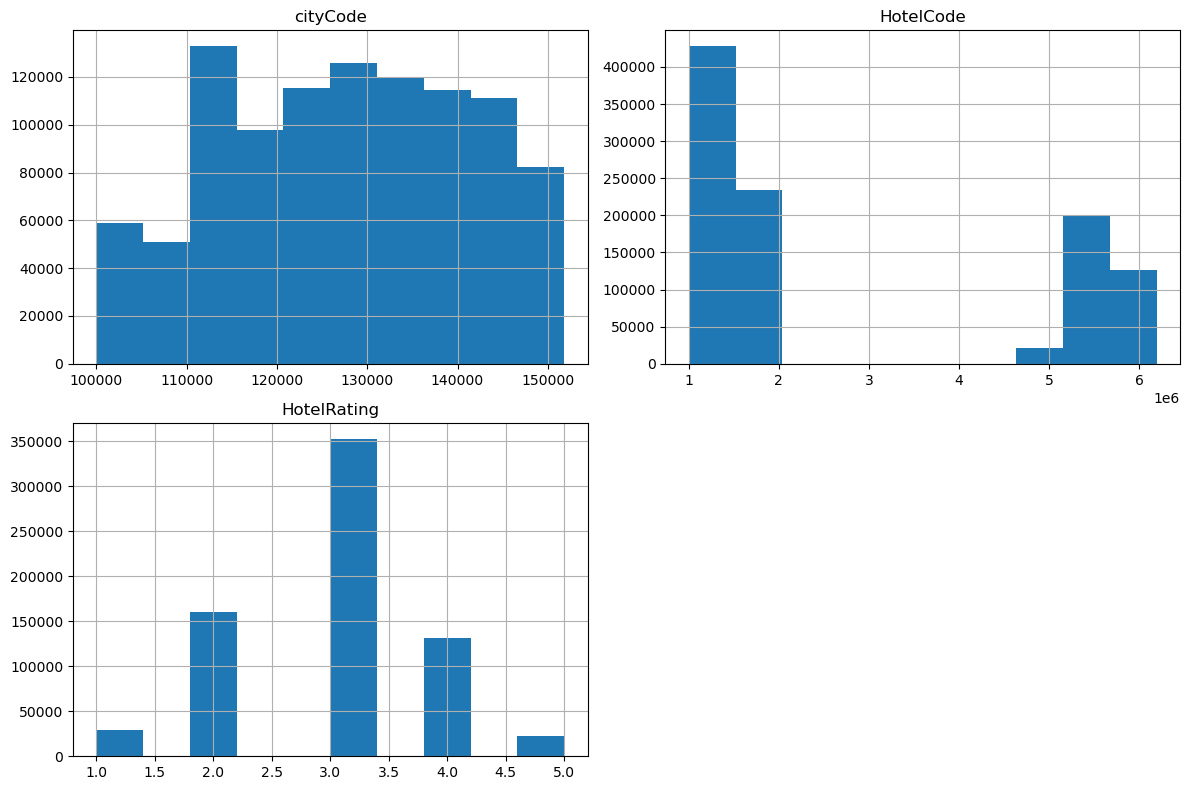

In [188]:
# --- Visualize distributions of numerical features ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()

In [189]:
# --- Analyze categorical features ---
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())


Value counts for countyCode:
countyCode
US    139868
IT     95977
ES     81620
GB     68169
FR     56247
Name: count, dtype: int64

Value counts for countyName:
countyName
United States     139868
Italy              95977
Spain              81620
United Kingdom     68169
France             56247
Name: count, dtype: int64

Value counts for cityName:
cityName
London                  5962
Orlando,   Florida      5523
Bali                    3153
Kissimmee,   Florida    2848
Cornwall                2721
Name: count, dtype: int64

Value counts for HotelName:
HotelName
Quality Inn             440
Rodeway Inn             321
Econo Lodge             321
Quality Inn & Suites    276
Comfort Inn & Suites    254
Name: count, dtype: int64

Value counts for Address:
Address
123 Main St                   637
Various Addresses             368
Unnamed Road                  347
Hallets Shute Freshwater      138
Strandallee 44                128
Name: count, dtype: int64

Value counts for Attractions:
A

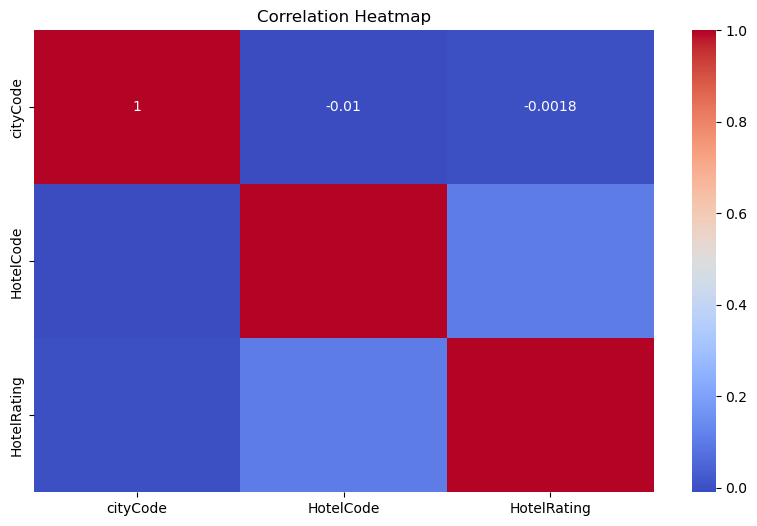

In [190]:
# --- Correlation heatmap ---
if len(num_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")

In [191]:
# --- Unique value counts for each column ---
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

countyCode: 134 unique values
countyName: 136 unique values
cityCode: 42275 unique values
cityName: 41821 unique values
HotelCode: 773702 unique values
HotelName: 719402 unique values
HotelRating: 5 unique values
Address: 739796 unique values
Attractions: 357697 unique values
Description: 732444 unique values
FaxNumber: 292389 unique values
HotelFacilities: 656894 unique values
Map: 743246 unique values
PhoneNumber: 433346 unique values
PinCode: 142146 unique values
HotelWebsiteUrl: 566539 unique values


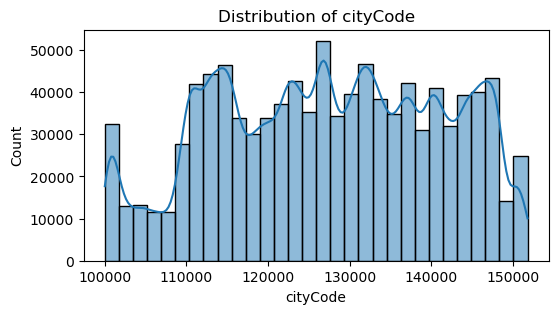

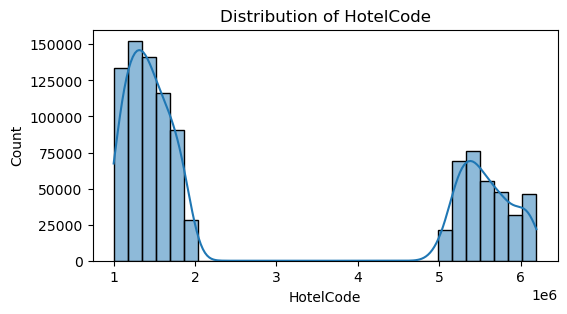

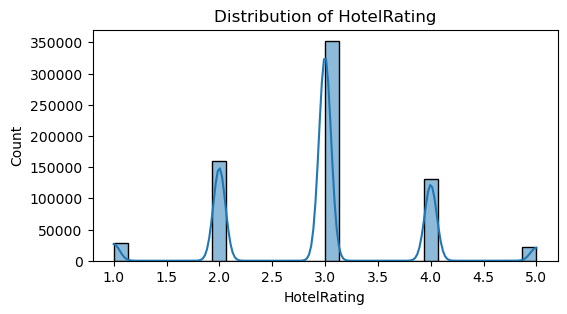

In [192]:
# --- Distribution plots for important numerical columns ---
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

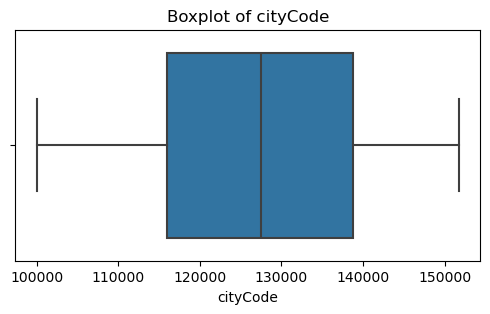

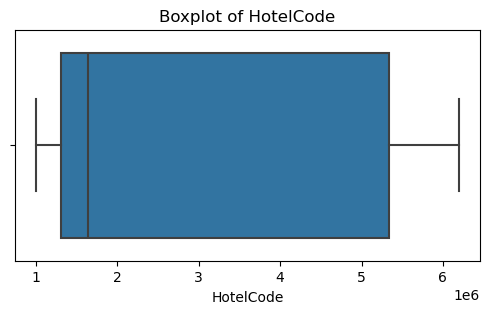

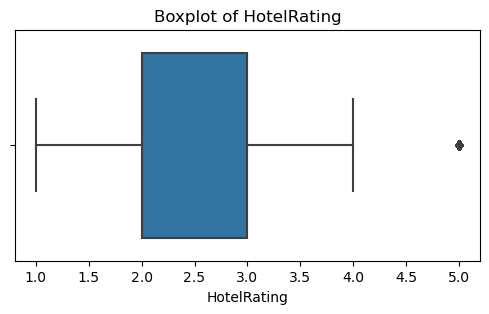

In [193]:
# --- Boxplots for outlier detection ---
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [194]:
# --- Top 10 most frequent hotels, cities, and counties ---
for col in ['HotelName', 'cityName', 'countyName']:
    if col in df.columns:
        print(f"Top 10 {col}:")
        print(df[col].value_counts().head(10))
        print()

Top 10 HotelName:
HotelName
Quality Inn                440
Rodeway Inn                321
Econo Lodge                321
Quality Inn & Suites       276
Comfort Inn & Suites       254
Comfort Inn                250
Americas Best Value Inn    203
Hotel Europa               156
Comfort Suites             148
Budget Inn                 126
Name: count, dtype: int64

Top 10 cityName:
cityName
London                  5962
Orlando,   Florida      5523
Bali                    3153
Kissimmee,   Florida    2848
Cornwall                2721
Kuala Lumpur            2588
Chonburi                2258
Rome                    2217
Seoul                   2156
Phuket                  2094
Name: count, dtype: int64

Top 10 countyName:
countyName
United States     139868
Italy              95977
Spain              81620
United Kingdom     68169
France             56247
Germany            53039
India              37382
Brazil             29467
Austria            29192
Australia          27072
Name: count,

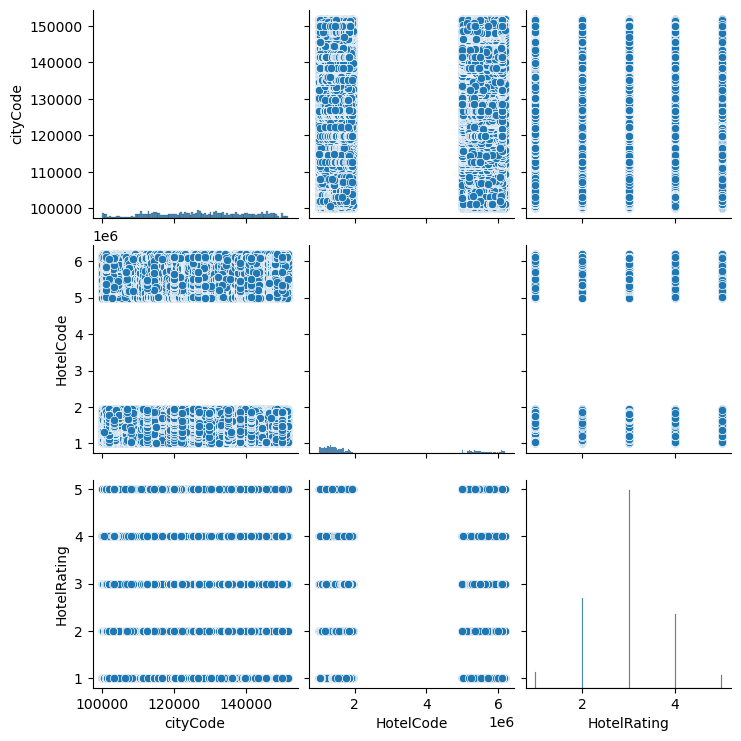

In [195]:
# --- Pairplot for selected features (if not too many) ---
selected_cols = num_cols[:4]  # Adjust as needed
if len(selected_cols) > 1:
    sns.pairplot(df[selected_cols].dropna())
    plt.show()

## INSIGHTS: World

In [196]:
# Insight: Total Number of Hotels and Unique Hotel Names in the World
if 'HotelName' in df.columns:
    total_hotels = df.shape[0]
    unique_hotel_names = df['HotelName'].nunique()
    print(f"Total number of hotel records in the world (based on dataset): {total_hotels}")
    print(f"Total number of unique hotel names in the world: {unique_hotel_names}")
else:
    print("No 'HotelName' column found in the dataset.")

Total number of hotel records in the world (based on dataset): 1010033
Total number of unique hotel names in the world: 719402


In [197]:
# 1. Top 30 Highest Rated Hotels (from Top 3 Counties with Most Hotels)
if 'HotelName' in df.columns and 'HotelRating' in df.columns and 'countyName' in df.columns:
    # Find top 3 counties by number of hotels
    top_counties = df['countyName'].value_counts().head(3).index
    # Filter dataframe for only those counties
    df_top_counties = df[df['countyName'].isin(top_counties)]
    print("1. Top 30 Highest Rated Hotels (from Top 3 Counties with Most Hotels):")
    top_rated = (
        df_top_counties[['HotelName', 'cityName', 'countyName', 'HotelRating']]
        .sort_values(by='HotelRating', ascending=False)
        .drop_duplicates('HotelName')
        .head(30)
    )
    print(top_rated, "\n")

1. Top 30 Highest Rated Hotels (from Top 3 Counties with Most Hotels):
                                           HotelName  \
910095                           Celebration Retreat   
670710                                  Kaktus Playa   
499467      Falisia a Luxury Collection Resort & Spa   
946472                         The Tides South Beach   
418101    Cristallo A Luxury Collection Resort & Spa   
925167                       The Villas at Poipu Kai   
894525          Adlerskron Four Bedroom Holiday Home   
499442                    Hotel Greif Maria Theresia   
499441                     Grand Hotel Duchi D'Aosta   
418110                   Faloria Mountain Spa Resort   
670666         Hotel Camiral at PGA Catalunya Resort   
670672              Holiday Rentals at PGA Catalunya   
698825                               Barceló Imagine   
894509  All About the View Four Bedroom Holiday Home   
727301           SENTIDO Pula Suites Boutique Resort   
946398           Four Seasons Hot

2. Rating Distribution by City (Top 10 Cities by Number of Hotels):


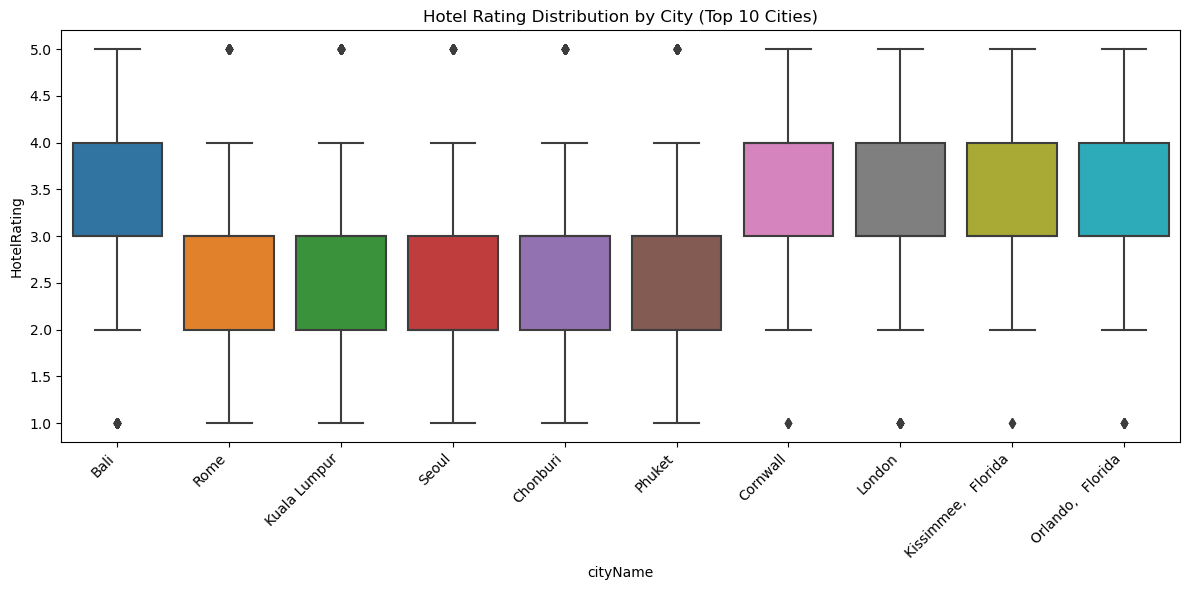

In [198]:
# 2. Rating Distribution by City (Top 10 Cities by Number of Hotels)
if 'cityName' in df.columns and 'HotelRating' in df.columns:
    print("2. Rating Distribution by City (Top 10 Cities by Number of Hotels):")
    # Get top 10 cities by number of hotels
    top_cities = df['cityName'].value_counts().head(10).index
    df_box = df[df['cityName'].isin(top_cities)][['cityName', 'HotelRating']].dropna(subset=['HotelRating'])
    if not df_box.empty:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='cityName', y='HotelRating', data=df_box)
        plt.title('Hotel Rating Distribution by City (Top 10 Cities)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No hotel ratings available to display.\n")

3. Most Popular Cities by Number of Hotels:
cityName
London                  5962
Orlando,   Florida      5523
Bali                    3153
Kissimmee,   Florida    2848
Cornwall                2721
Kuala Lumpur            2588
Chonburi                2258
Rome                    2217
Seoul                   2156
Phuket                  2094
Name: count, dtype: int64 



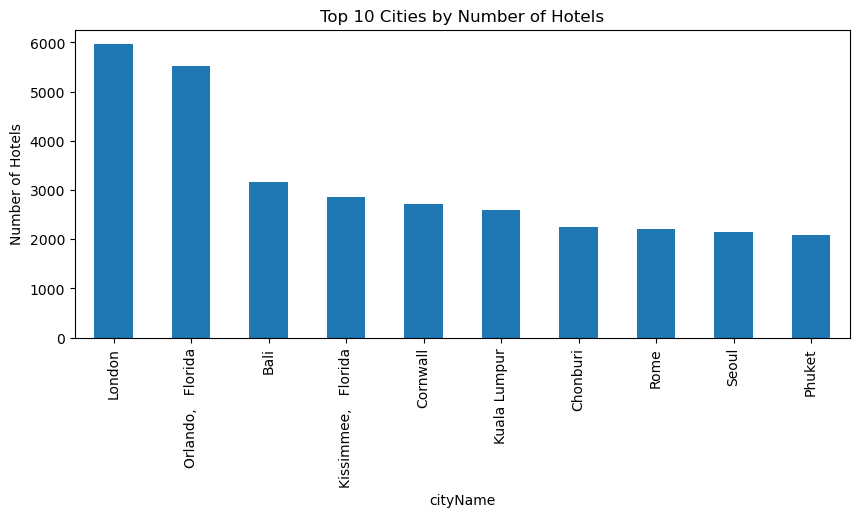

In [199]:
# 3. Most Popular Cities by Number of Hotels
if 'cityName' in df.columns:
    print("3. Most Popular Cities by Number of Hotels:")
    city_counts = df['cityName'].value_counts().head(10)
    print(city_counts, "\n")
    city_counts.plot(kind='bar', figsize=(10,4), title='Top 10 Cities by Number of Hotels')
    plt.ylabel('Number of Hotels')
    plt.show()

4. Most Popular Counties by Number of Hotels:
countyName
United States     139868
Italy              95977
Spain              81620
United Kingdom     68169
France             56247
Germany            53039
India              37382
Brazil             29467
Austria            29192
Australia          27072
Name: count, dtype: int64 



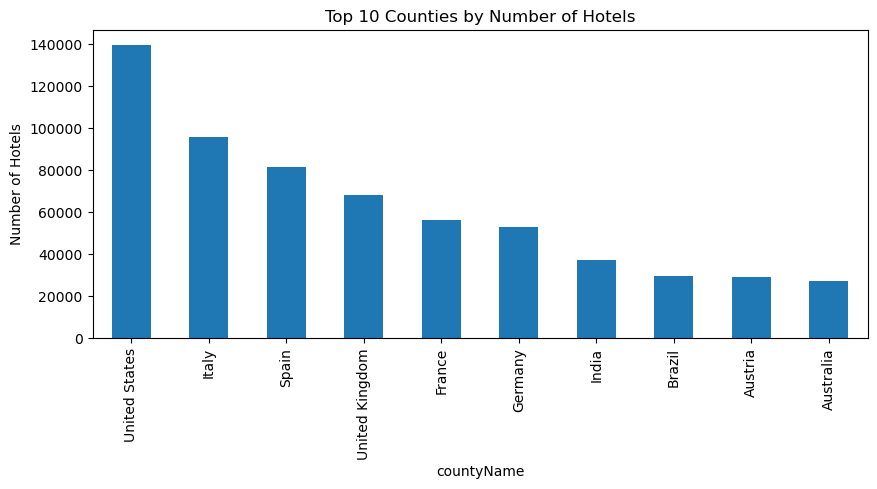

In [200]:
# 4. Most Popular Counties by Number of Hotels
if 'countyName' in df.columns:
    print("4. Most Popular Counties by Number of Hotels:")
    county_counts = df['countyName'].value_counts().head(10)
    print(county_counts, "\n")
    county_counts.plot(kind='bar', figsize=(10,4), title='Top 10 Counties by Number of Hotels')
    plt.ylabel('Number of Hotels')
    plt.show()

5. Hotel Rating Distribution:
HotelRating
1.0     28734
2.0    159754
3.0    352613
4.0    130862
5.0     22402
Name: count, dtype: int64 



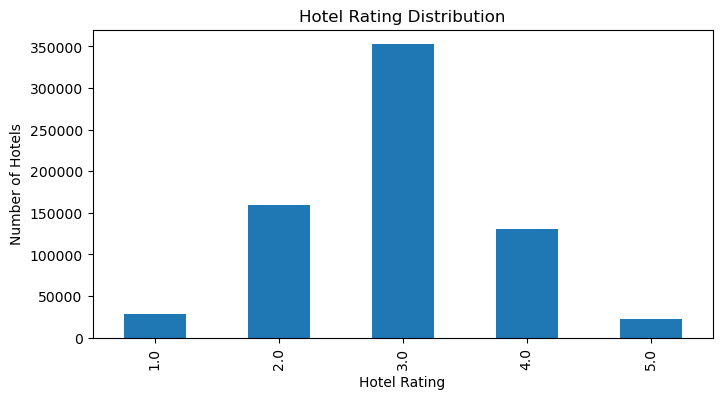

In [201]:
# 5. Hotel Rating Distribution
if 'HotelRating' in df.columns:
    print("5. Hotel Rating Distribution:")
    rating_counts = df['HotelRating'].value_counts().sort_index()
    if rating_counts.empty:
        print("No hotel ratings available to display.\n")
    else:
        print(rating_counts, "\n")
        rating_counts.plot(kind='bar', figsize=(8,4), title='Hotel Rating Distribution')
        plt.ylabel('Number of Hotels')
        plt.xlabel('Hotel Rating')
        plt.show()

In [202]:
# 6. Hotels with Missing Ratings
missing = df[df['HotelRating'].isnull()]
print(f"6. Number of hotels with missing rating: {missing.shape[0]}\n")

6. Number of hotels with missing rating: 315668



## INSIGHTS: Malaysia Only

In [203]:
# Insight: Total Number of Hotels and Unique Hotel Names in Malaysia
if 'HotelName' in df.columns and 'countyName' in df.columns:
    df_my = df[df['countyName'].str.strip().str.lower() == 'malaysia']
    total_hotels_my = df_my.shape[0]
    unique_hotel_names_my = df_my['HotelName'].nunique()
    print(f"Total number of hotel records in Malaysia: {total_hotels_my}")
    print(f"Total number of unique hotel names in Malaysia: {unique_hotel_names_my}")
else:
    print("Required columns not found in the dataset.")

Total number of hotel records in Malaysia: 10896
Total number of unique hotel names in Malaysia: 8055


In [204]:
if 'countyName' in df.columns:
    df_my = df[df['countyName'].str.strip().str.lower() == 'malaysia'].copy()

    print("\n=== Insights: Malaysia Only ===\n")

    # 1. Top 10 Highest Rated Hotels in Malaysia
    if 'HotelName' in df_my.columns and 'HotelRating' in df_my.columns:
        print("1. Top 10 Highest Rated Hotels (Malaysia):")
        top_rated_my = df_my[['HotelName', 'HotelRating', 'cityName']].sort_values(by='HotelRating', ascending=False).drop_duplicates('HotelName').head(10)
        print(top_rated_my, "\n")


=== Insights: Malaysia Only ===

1. Top 10 Highest Rated Hotels (Malaysia):
                                                HotelName  HotelRating  \
526145                     Bunga Raya Island Resort & Spa          5.0   
526679                         Pelangi Beach Resort & Spa          5.0   
530837               Swiss Garden Beach Resort Damai Laut          5.0   
530805                       Tanjung Rhu Pool Villa @ Trv          5.0   
530750                          PARKROYAL Langkawi Resort          5.0   
530608                          The Ritz Carlton Langkawi          5.0   
526386                       Kota Kinabalu Marriott Hotel          5.0   
530576                             The St. Regis Langkawi          5.0   
533894           Movenpick Hotel & Convention Centre KLIA          5.0   
530469  The Danna Langkawi - A Member of Small Luxury ...          5.0   

             cityName  
526145  Kota Kinabalu  
526679           Kuah  
530837          Lumut  
530805      

2. Rating Distribution by City (Malaysia):


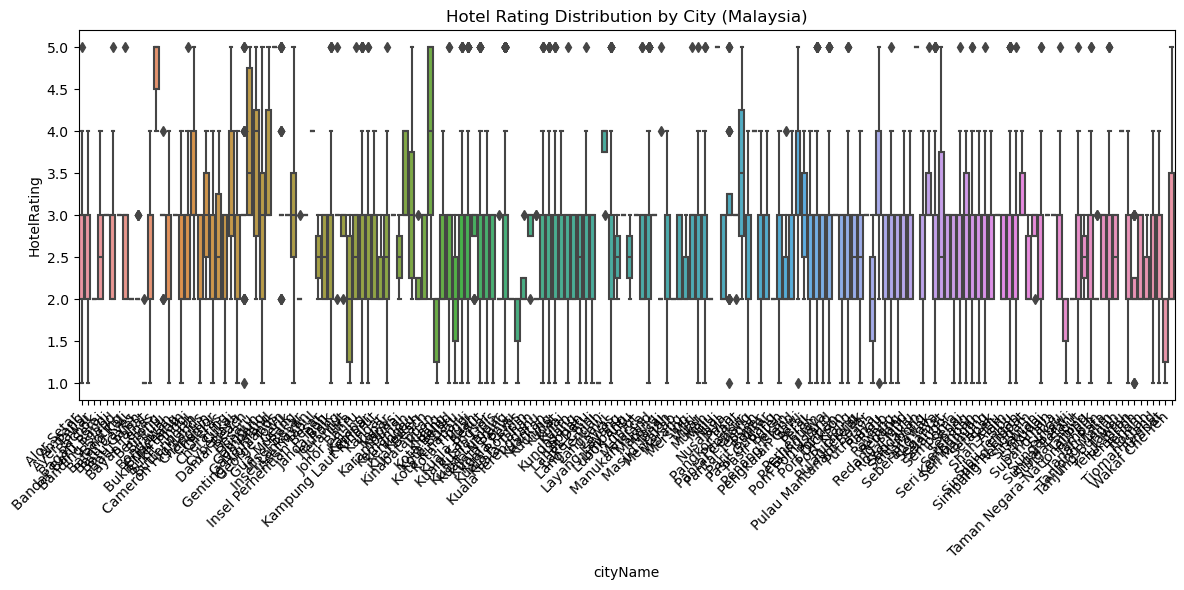

In [205]:
 # 2. Rating Distribution by City in Malaysia
if 'cityName' in df_my.columns and 'HotelRating' in df_my.columns:
        print("2. Rating Distribution by City (Malaysia):")
        df_my_box = df_my[['cityName', 'HotelRating']].dropna(subset=['HotelRating'])
        if not df_my_box.empty:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='cityName', y='HotelRating', data=df_my_box)
            plt.title('Hotel Rating Distribution by City (Malaysia)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No hotel ratings available to display.\n")


3. Rating Distribution by City (Malaysia, Top 10 Cities by Number of Hotels):


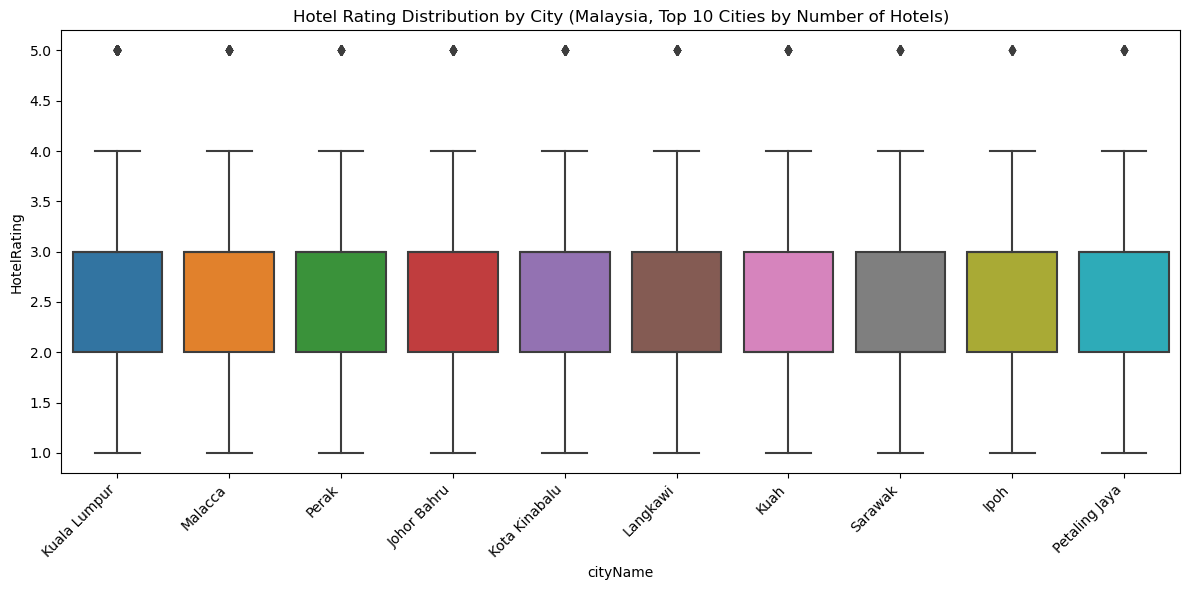

In [206]:
# 3. Rating Distribution by City in Malaysia (Top 10 Cities by Number of Hotels, Sorted Descending)
if 'cityName' in df_my.columns and 'HotelRating' in df_my.columns:
    print("3. Rating Distribution by City (Malaysia, Top 10 Cities by Number of Hotels):")
    # Get top 10 cities by number of hotels in Malaysia, sorted descending
    top_cities_my = df_my['cityName'].value_counts().head(10).sort_values(ascending=False).index
    df_my_box = df_my[df_my['cityName'].isin(top_cities_my)][['cityName', 'HotelRating']].dropna(subset=['HotelRating'])
    # Ensure the city order in the plot matches the hotel count order
    df_my_box['cityName'] = pd.Categorical(df_my_box['cityName'], categories=top_cities_my, ordered=True)
    if not df_my_box.empty:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='cityName', y='HotelRating', data=df_my_box, order=top_cities_my)
        plt.title('Hotel Rating Distribution by City (Malaysia, Top 10 Cities by Number of Hotels)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No hotel ratings available to display.\n")

4. Most Popular Cities by Number of Hotels (Malaysia):
cityName
Kuala Lumpur     2588
Malacca           711
Perak             527
Johor Bahru       525
Kota Kinabalu     521
Langkawi          423
Kuah              412
Sarawak           391
Ipoh              341
Petaling Jaya     263
Name: count, dtype: int64 



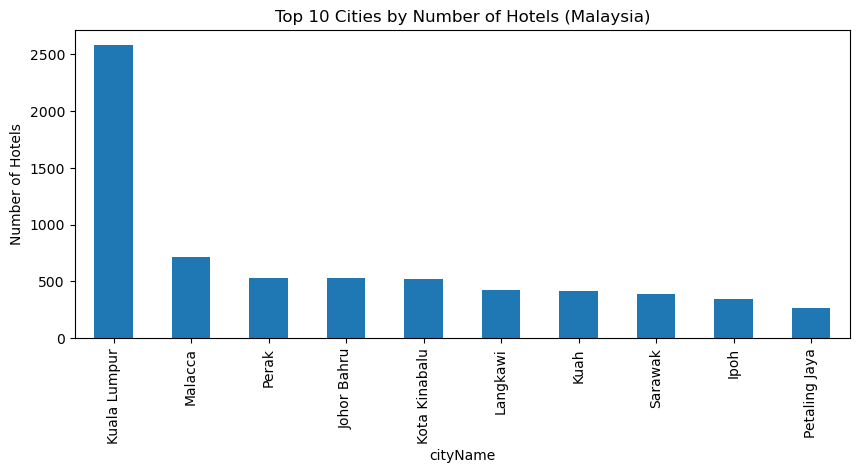

In [207]:

    # 4. Most Popular Cities by Number of Hotels in Malaysia
    if 'cityName' in df_my.columns:
        print("4. Most Popular Cities by Number of Hotels (Malaysia):")
        city_counts_my = df_my['cityName'].value_counts().head(10)
        print(city_counts_my, "\n")
        city_counts_my.plot(kind='bar', figsize=(10,4), title='Top 10 Cities by Number of Hotels (Malaysia)')
        plt.ylabel('Number of Hotels')
        plt.show()

    

5. Hotel Rating Distribution (Malaysia):
HotelRating
1.0     448
2.0    3904
3.0    4198
4.0     701
5.0     325
Name: count, dtype: int64 



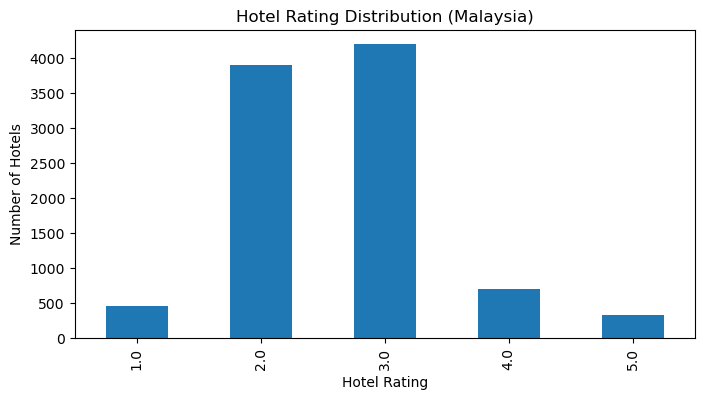

In [208]:

# 5. Hotel Rating Distribution in Malaysia
if 'HotelRating' in df_my.columns:
        print("5. Hotel Rating Distribution (Malaysia):")
        rating_counts_my = df_my['HotelRating'].value_counts().sort_index()
        if rating_counts_my.empty:
            print("No hotel ratings available to display.\n")
        else:
            print(rating_counts_my, "\n")
            rating_counts_my.plot(kind='bar', figsize=(8,4), title='Hotel Rating Distribution (Malaysia)')
            plt.ylabel('Number of Hotels')
            plt.xlabel('Hotel Rating')
            plt.show()

    

In [209]:
# 6. Hotels with Missing Ratings in Malaysia
missing_my = df_my[df_my['HotelRating'].isnull()]
print(f"6. Number of hotels with missing rating (Malaysia): {missing_my.shape[0]}\n")

6. Number of hotels with missing rating (Malaysia): 1320



In [210]:
## INSIGHTS: Indonesia Only

In [211]:
# Insight: Total Number of Hotels and Unique Hotel Names in Indonesia
if 'HotelName' in df.columns and 'countyName' in df.columns:
    df_id = df[df['countyName'].str.strip().str.lower() == 'indonesia']
    total_hotels_id = df_id.shape[0]
    unique_hotel_names_id = df_id['HotelName'].nunique()
    print(f"Total number of hotel records in Indonesia: {total_hotels_id}")
    print(f"Total number of unique hotel names in Indonesia: {unique_hotel_names_id}")
else:
    print("Required columns not found in the dataset.")     


Total number of hotel records in Indonesia: 14589
Total number of unique hotel names in Indonesia: 12512


In [212]:
# --- INSIGHTS: Indonesia Only ---

if 'countyName' in df.columns:
    df_id = df[df['countyName'].str.strip().str.lower() == 'indonesia'].copy()

    print("\n=== Insights: Indonesia Only ===\n")

 # 1. Top 10 Highest Rated Hotels in Indonesia
if 'HotelName' in df_id.columns and 'HotelRating' in df_id.columns:
        print("1. Top 10 Highest Rated Hotels (Indonesia):")
        top_rated_id = df_id[['HotelName', 'cityName', 'HotelRating', ]].sort_values(by='HotelRating', ascending=False).drop_duplicates('HotelName').head(10)
        print(top_rated_id, "\n")

 


=== Insights: Indonesia Only ===

1. Top 10 Highest Rated Hotels (Indonesia):
                                         HotelName  cityName  HotelRating
397076                  Hillside Suite Guest House    Malang          5.0
399979                              Anapuri Villas  Sukawati          5.0
388734                                Viceroy Bali      Bali          5.0
388732               Anantara Seminyak Bali Resort      Bali          5.0
399976                           The Sanctoo Villa  Sukawati          5.0
387955                             Pandawas Villas      Bali          5.0
398654                      Maya Ubud Resort & Spa  Peliatan          5.0
387960                          Club At The Legian      Bali          5.0
401386       Renaissance Bali Uluwatu Resort & Spa   Ungasan          5.0
387966  Luna2 Seminyak by Premier Hospitality Asia      Bali          5.0 



2. Rating Distribution by City (Indonesia, Top 10 Cities by Number of Hotels):


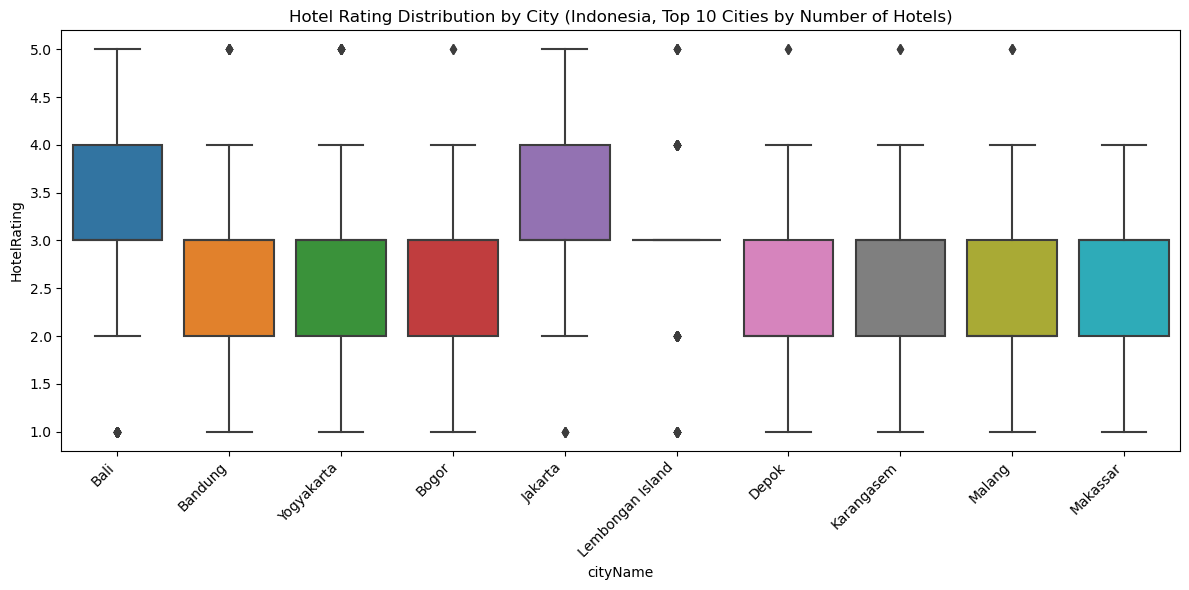

In [213]:
   # 2. Rating Distribution by City in Indonesia (Top 10 Cities by Number of Hotels)
if 'cityName' in df_id.columns and 'HotelRating' in df_id.columns:
        print("2. Rating Distribution by City (Indonesia, Top 10 Cities by Number of Hotels):")
        top_cities_id = df_id['cityName'].value_counts().head(10).sort_values(ascending=False).index
        df_id_box = df_id[df_id['cityName'].isin(top_cities_id)][['cityName', 'HotelRating']].dropna(subset=['HotelRating'])
        df_id_box['cityName'] = pd.Categorical(df_id_box['cityName'], categories=top_cities_id, ordered=True)
        if not df_id_box.empty:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='cityName', y='HotelRating', data=df_id_box, order=top_cities_id)
            plt.title('Hotel Rating Distribution by City (Indonesia, Top 10 Cities by Number of Hotels)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No hotel ratings available to display.\n")

    

3. Most Popular Cities by Number of Hotels (Indonesia):
cityName
Bali                3090
Bandung             1114
Yogyakarta           496
Bogor                348
Jakarta              326
Lembongan Island     307
Depok                270
Karangasem           266
Malang               261
Makassar             246
Name: count, dtype: int64 



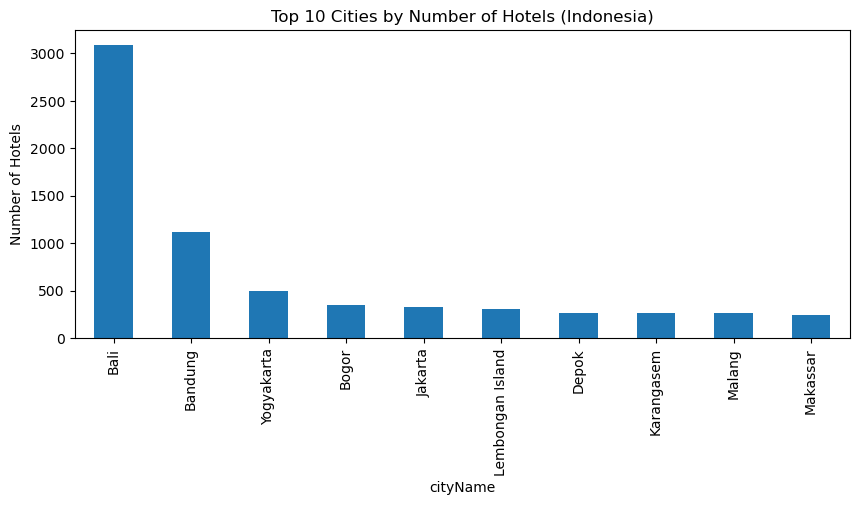

In [214]:
# 3. Most Popular Cities by Number of Hotels in Indonesia
if 'cityName' in df_id.columns:
        print("3. Most Popular Cities by Number of Hotels (Indonesia):")
        city_counts_id = df_id['cityName'].value_counts().head(10)
        print(city_counts_id, "\n")
        city_counts_id.plot(kind='bar', figsize=(10,4), title='Top 10 Cities by Number of Hotels (Indonesia)')
        plt.ylabel('Number of Hotels')
        plt.show()

 

4. Hotel Rating Distribution (Indonesia):
HotelRating
1.0     945
2.0    3832
3.0    6475
4.0    2015
5.0     439
Name: count, dtype: int64 



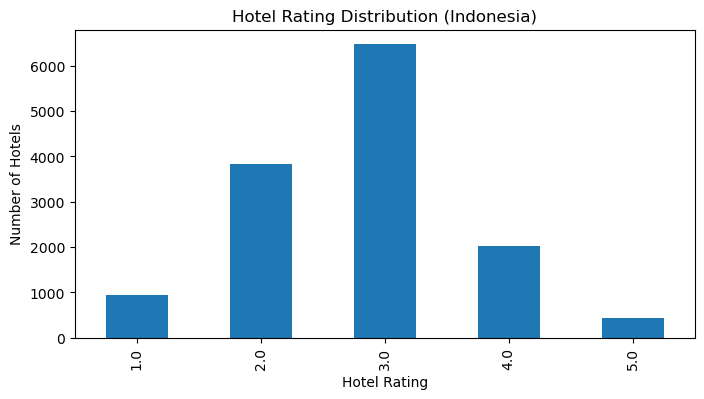

In [216]:
# 4. Hotel Rating Distribution in Indonesia
if 'HotelRating' in df_id.columns:
        print("4. Hotel Rating Distribution (Indonesia):")
        rating_counts_id = df_id['HotelRating'].value_counts().sort_index()
        if rating_counts_id.empty:
            print("No hotel ratings available to display.\n")
        else:
            print(rating_counts_id, "\n")
            rating_counts_id.plot(kind='bar', figsize=(8,4), title='Hotel Rating Distribution (Indonesia)')
            plt.ylabel('Number of Hotels')
            plt.xlabel('Hotel Rating')
            plt.show()

 

In [217]:
# 5. Hotels with Missing Ratings in Indonesia
missing_id = df_id[df_id['HotelRating'].isnull()]
print(f"5. Number of hotels with missing rating (Indonesia): {missing_id.shape[0]}\n")

5. Number of hotels with missing rating (Indonesia): 883

